In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [ ]:
img = image.load_img("/content/drive/MyDrive/Skin Tone/basedata/training/dark brown/(10).jpg")

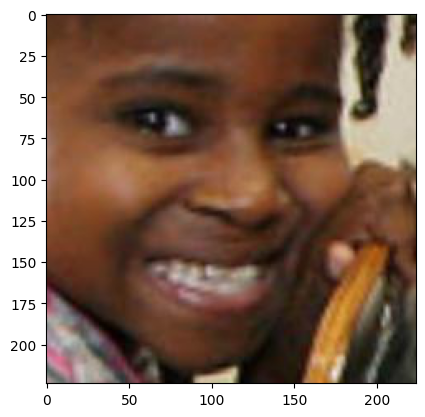

In [ ]:
plt.imshow(img)

In [ ]:
cv2.imread("/content/drive/MyDrive/Skin Tone/basedata/training/dark brown/(10).jpg").shape

(224, 224, 3)

In [ ]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [ ]:
train_dataset = train.flow_from_directory("/content/drive/MyDrive/Skin Tone/basedata/training",
                                          target_size = (224,224),
                                          batch_size = 32,
                                          class_mode = 'categorical')
validation_dataset = validation.flow_from_directory("/content/drive/MyDrive/Skin Tone/basedata/validation",
                                          target_size = (224,224),
                                          batch_size = 32,
                                          class_mode = 'categorical')

Found 623 images belonging to 3 classes.
Found 633 images belonging to 3 classes.


In [ ]:
train_dataset.class_indices

{'Olive': 0, 'White': 1, 'dark brown': 2}

In [ ]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (224,224,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(256,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),  
                                    tf.keras.layers.Conv2D(512,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),                                 
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512,activation = 'relu'),
                                    tf.keras.layers.Dense(256,activation = 'relu'),
                                    tf.keras.layers.Dense(128,activation = 'relu'),
                                    tf.keras.layers.Dense(64,activation = 'relu'),
                                    tf.keras.layers.Dense(32,activation = 'relu'),
                                    tf.keras.layers.Dense(16,activation = 'relu'),
                                    tf.keras.layers.Dense(3,activation = 'softmax')
                                    ])

In [ ]:
model.compile(loss= 'binary_crossentropy',
              optimizer =Adam(learning_rate=0.001),
              metrics = ['accuracy']
              )

In [ ]:
model_fit = model.fit(train_dataset,
                      epochs= 50,
                      validation_data= validation_dataset)

Epoch 1/50
20/20 [==============================] - 401s 20s/step - loss: 0.6594 - accuracy: 0.2986 - val_loss: 0.6425 - val_accuracy: 0.3223
Epoch 2/50
20/20 [==============================] - 43s 2s/step - loss: 0.6354 - accuracy: 0.3242 - val_loss: 0.6333 - val_accuracy: 0.3444
Epoch 3/50
20/20 [==============================] - 54s 3s/step - loss: 0.6200 - accuracy: 0.3804 - val_loss: 0.6229 - val_accuracy: 0.5845
Epoch 4/50
20/20 [==============================] - 43s 2s/step - loss: 0.5501 - accuracy: 0.5618 - val_loss: 0.5762 - val_accuracy: 0.5719
Epoch 5/50
20/20 [==============================] - 50s 3s/step - loss: 0.5218 - accuracy: 0.5522 - val_loss: 0.4744 - val_accuracy: 0.6303
Epoch 6/50
20/20 [==============================] - 43s 2s/step - loss: 0.4818 - accuracy: 0.6244 - val_loss: 0.4358 - val_accuracy: 0.7030
Epoch 7/50
20/20 [==============================] - 43s 2s/step - loss: 0.4329 - accuracy: 0.6758 - val_loss: 0.5306 - val_accuracy: 0.6809
Epoch 8/50
20/20 [

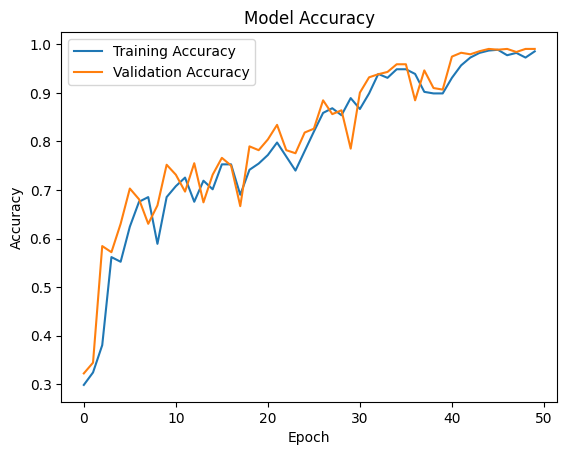

In [ ]:
plt.plot(model_fit.history['accuracy'], label='Training Accuracy')
plt.plot(model_fit.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

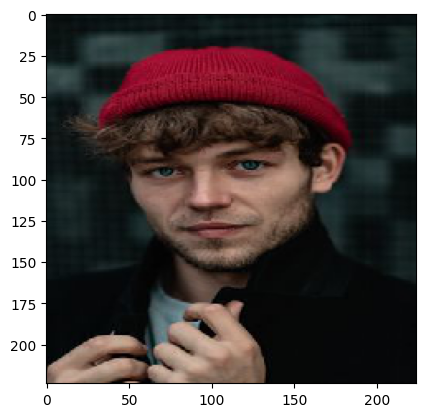

1/1 [==============================] - 0s 32ms/step
Your skin tone is Dark Brown


In [ ]:
file_path = '/content/pp.jpg'

img = image.load_img(file_path, target_size=(224, 224))
plt.imshow(img)
plt.show()

X = image.img_to_array(img)
X = np.expand_dims(X, axis=0)
X = X / 255.0
images = np.vstack([X])
val = model.predict(images)

if np.argmax(val) == 0:
    print("Your skin tone is Olive")
elif np.argmax(val) == 1:
    print("Your skin tone is White")
else:
    print("Your skin tone is Dark Brown")

In [ ]:
#Saving the model

from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/SkinTone/Savemodel')